In [1]:
import numpy as np
import matplotlib.pyplot as plt
import kriging

np.random.seed(1)

To demonstrate the interpolation effect, let's turn to some data.

In [2]:
x = np.random.uniform(0,100,15)
y = np.random.uniform(0,100,15)
z = np.random.uniform(0,100,15)
xy = np.c_[x,y]

Then let's interpolate it

In [3]:
kri = kriging.Kriging()
kri.fit(xy,z)

In [4]:
xls = np.linspace(0,100,100)
yls = np.linspace(0,100,100)
xgrid,ygrid = np.meshgrid(xls,yls)

In [5]:
zgridls = kri.predict(np.c_[xgrid.ravel(),ygrid.ravel()])
zgrid = zgridls.reshape(*xgrid.shape)

Let's show:

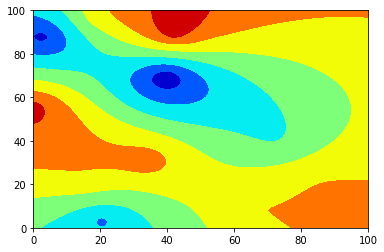

In [6]:
plt.contourf(xgrid,ygrid,zgrid,cmap='jet')

Next, interpolate with some real data

In addition, the interpolation process is further encapsulated.

This is a set of temperature data for 2018 in China.

In [7]:
data = np.genfromtxt('data/temperature.csv',delimiter=',')[1:]

In [8]:
xgrid2,ygrid2,zgrid2 = kriging.interpolate(data[:,:2][:,::-1],data[:,-1],point_counts=(500,500))

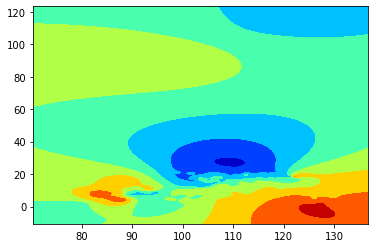

In [9]:
plt.contourf(xgrid2,ygrid2,zgrid2,cmap='jet')

You can also insert the map.
This requires loading map data.

In [10]:
mapdata = kriging.load_mapdata()

(10, 60)

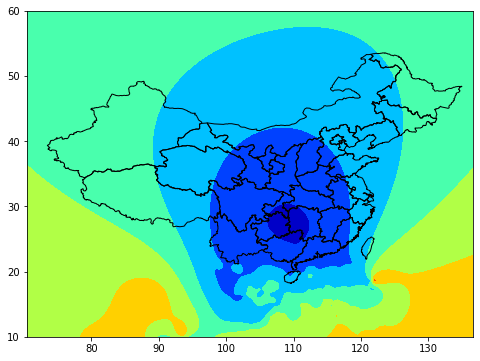

In [11]:
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.contourf(xgrid2,ygrid2,zgrid2,cmap='jet')
kriging.plot_map(mapdata['China'],ax=ax)
plt.ylim(10,60)

In [12]:
mask = kriging.shape_shadow(xgrid2,ygrid2,mapdata['China'])

(10, 60)

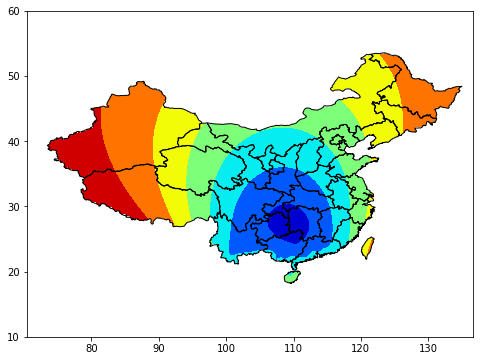

In [13]:
zgrid2_mask = np.ma.array(zgrid2,mask=mask)
fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.contourf(xgrid2,ygrid2,zgrid2_mask,cmap='jet')
kriging.plot_map(mapdata['China'],ax=ax)
plt.ylim(10,60)